## Basic Neural network -

Basic neural network contains :
* Input layer - this layer takes in the iput data but should formated in a way such that machine can understand . If text it has to tokenized (text to numbers ) , size depends upon number of feature, for pics it is pixel which depends.

* Hidden layer - These are the layers which are connected to i/p layer and is called hidden because , machine has control over these layers . As in weights and bias are adjuseted accordingly.

* Output Layer -  the ouput layer depend upon the type to type of result we want. Eg - in classification of sentiments , 2 layer o/p i.e negative or positive, or in pics differentiating cats and dogs etc etc..

![Image of Neural network](https://databricks.com/wp-content/uploads/2019/02/neural1.jpg)

## Single Neuron-
* Sum of inputs if other neurons are connected , if i/p layer the i/p is the data . if its a hidden layer i/p's would be sum of o/p of other neurons.
* [I/P * WEIGHT + BIAS] summed together
* activation function - acts as firing , converting linear o/p to non linear . eg - stepper function , sigmoid , relu etc etc 

## Training neural network
* passing in the input data and adjusting its weights and bias acrross all the neural such that it can predict the ouput .
* it take million of data with many variables which is runned in epoches (loops in neural network) which makes a model mature enough to work efficiently .


## What is pytorch ?
* pytorch is numpy on GPU , thats it 
* has inbuilt function which contains many modules which can help build neural networks easily

## What is a tensor ?
* It is a array 
* maybe multi dimension array
* & using tensors we can put this in GPU, which helps calculating weights and biases much faster



In [5]:
## import library:

import torch

In [8]:
x = torch.Tensor([2,5])
print(x)

tensor([2., 5.])


In [10]:
y = torch.rand([2,5]) ## We get random initialisation of 2,5 
print(y)

tensor([[1.5526e-01, 8.9394e-01, 5.4234e-04, 9.4524e-01, 5.1952e-01],
        [9.5345e-01, 8.1685e-01, 1.9593e-01, 9.5136e-01, 2.8721e-01]])


In [13]:
## REshaping tensor : OR Basically flatten
# basically converting 2 x 5 i/p to single dimension or flattened i.e 1 x 10 

y = y.view([1,10])

tensor([[1.5526e-01, 8.9394e-01, 5.4234e-04, 9.4524e-01, 5.1952e-01, 9.5345e-01,
         8.1685e-01, 1.9593e-01, 9.5136e-01, 2.8721e-01]])

## Data prep

We would be using torchvision dataset MNIST images dataset.

MNIST is a hand drawn digits dataset

In [19]:
import torch
import torchvision
from torchvision import transforms,datasets

In [27]:
# train = datasets.FashionMNIST("",train=True,download=True,transform = transforms.Compose([transforms.ToTensor()])) 
# ## We are transforing it to tensor directly

# test = datasets.FashionMNIST("",train=False,download=True,
#                              transform = transforms.Compose([transforms.ToTensor()])) 

In [24]:
train = datasets.MNIST("",train=True,download=True,transform = transforms.Compose([transforms.ToTensor()])) 
## We are transforing it to tensor directly

test = datasets.MNIST("",train=False,download=True,
                             transform = transforms.Compose([transforms.ToTensor()])) 

100.1%

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


113.5%

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


100.4%

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


180.4%/Users/ajarpanwar/anaconda3/lib/python3.6/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [25]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [26]:
test

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

* **Batch** = batch is nothing but data feed in groups , eg 100 row data can be fed in 10 batches i.e 10 shuffeled rows data per time
* This whole operation can be done using dataloader func in pytorch in utils.data
* Dataloader helps prepare torch data in a way that is understandable by nn, & can be fed to GPU
* If we feed all data at once , model will overfit 
* Usally the batch size vary from 8 to 64 , but mainly depends upon RAM, size is not fixed rule but it depends

In [30]:
trainset = torch.utils.data.DataLoader(train,batch_size =10,shuffle = True)
testset = torch.utils.data.DataLoader(test,batch_size =10,shuffle = True)

In [38]:
## for iterating through dataloader. this data contains a single batch
for data in trainset:
    print(data)
    break
    

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [42]:
## Thus this is how the tensor converts the data of 28 x 28 image
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [43]:
## Printing data
import matplotlib.pyplot as plt

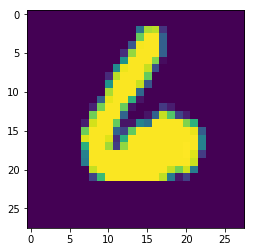

In [44]:
# plt.imshow(data[0][0]) # printing this would show an error due to the shape thus we have to flaten it
plt.imshow(data[0][0].view(28,28))

### Check data is balanced or not

In [72]:
print(train[0][1])

5


In [58]:
dic = {}
dic['num'] = 0
dic['count'] = 1
print(dic)

{'num': 0, 'count': 1}


In [67]:
dic = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
total = 0
for data in trainset:
    x,y = data
    for label in y:
        dic[int(label)]+=1
        total +=1

In [66]:
print(dic)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [71]:
for i in dic:
    print(f'{i}: {(dic[i]/total)*100}')

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


*thus data is almost balanced which for each class it is almost 10 %*

# Building model

* Simple neural network is a feed forward neural network where data passes in one direction:
* Here we are modifying simple neural network by adding activation function, which keeps numbers between a range & helps neurin in firing

In [74]:
import torch.nn as nn ## We have to initialise this
import torch.nn.functional as F ## Here we have to pass parameters

In [100]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() ## We are inherting the features of nn module
        self.fc1 = nn.Linear(28*28,64) ## flatten 28*28 i.e feature as input and output can anything
        self.fc2 = nn.Linear(64,80) # hidden layer 1 , output can be anythin we want, but input is output of fc1
        self.fc3 = nn.Linear(80,64) # hidden layer 2 , output can be anythin we want
        self.fc4 = nn.Linear(64,10) ## here 10 is the ouput as we 10 digits
   
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x,dim=1)

In [101]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [102]:
X = torch.rand([28,28])

In [106]:
X = X.view(1,28*28) ## 1 is specified because input will be of unkown shape as its shape is 1 by 28*28
X

tensor([[0.3196, 0.1044, 0.1343, 0.9877, 0.5658, 0.8307, 0.5631, 0.6815, 0.4484,
         0.7630, 0.4981, 0.1778, 0.3754, 0.0376, 0.4803, 0.8559, 0.3461, 0.2577,
         0.7660, 0.6704, 0.7199, 0.0253, 0.5073, 0.5351, 0.6584, 0.3951, 0.7941,
         0.0486, 0.0640, 0.4856, 0.0938, 0.5871, 0.7029, 0.0991, 0.5567, 0.8527,
         0.6369, 0.9197, 0.1024, 0.5484, 0.5431, 0.5729, 0.9824, 0.4559, 0.0586,
         0.4568, 0.0674, 0.4204, 0.8517, 0.3370, 0.9793, 0.4235, 0.1975, 0.6294,
         0.7656, 0.6795, 0.6139, 0.5657, 0.8225, 0.9148, 0.0739, 0.3808, 0.0248,
         0.0314, 0.6358, 0.3227, 0.0708, 0.3384, 0.9111, 0.3742, 0.8265, 0.9026,
         0.8205, 0.2537, 0.1400, 0.1579, 0.1709, 0.8375, 0.7153, 0.2749, 0.1617,
         0.2532, 0.2162, 0.8264, 0.4762, 0.4046, 0.4998, 0.5064, 0.7134, 0.2963,
         0.7659, 0.6266, 0.5406, 0.9597, 0.7047, 0.5794, 0.1694, 0.4205, 0.5571,
         0.3453, 0.0350, 0.3924, 0.5391, 0.3124, 0.3089, 0.9990, 0.4295, 0.5423,
         0.0870, 0.9308, 0.7

In [107]:
## We feed this data to model 
output = net(X)

In [108]:
## This is the actual prediction 
output

tensor([[-2.3456, -2.2506, -2.2979, -2.3358, -2.3908, -2.2394, -2.3405, -2.3646,
         -2.2763, -2.2012]], grad_fn=<LogSoftmaxBackward>)

## Loss :

How is the model predicting the values we want to predict 

## Learning Rate :
    - Learning rate determines the size of the setp our model needs to take to make loss as minimum as possible
    - If we make learning rate huge , it will take huge steps and will never get to the point of minima 
    - Hence we specify lower rate so as to it sticks to a lower point
    - Loss function is added to calculate the liss , there are many ways , one hot vectors  - MSE , singular values we have to use NLL loss etc. Know which loss is applicabe to which environment.
    
## Q . Know decaying learning rate ??


## Optimizer

Optimizer basically optimize model by adjusting the weights & biases in the network so as to minimise our loss . 

In [117]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters() , lr=0.001 )

## Epoch isiteration we want to make for our model through our data 

EPOCHES = 3

for epoch in range(EPOCHES):
    for data in trainset:
        X,y = data 
#         print(X[0])
#         print(y[0])
        net.zero_grad() #everytime we pass our data through our network we have to make gradient zero other it will add itself.'''
        output = net(X.view(-1,28*28)) ## now we have the ouput we have to calc how wrong are we 
        loss = F.nll_loss(output,y)
        loss.backward() ## back propagation
        optimizer.step()
    print(loss)

tensor(0.0189, grad_fn=<NllLossBackward>)
tensor(0.0649, grad_fn=<NllLossBackward>)
tensor(0.0155, grad_fn=<NllLossBackward>)


In [118]:
## lets check how are we performing , testing data:

correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X,y = data
        output = net(X.view(-1,784))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total+=1
            
print("Accuracy :",round(correct/total,3))

Accuracy : 0.968


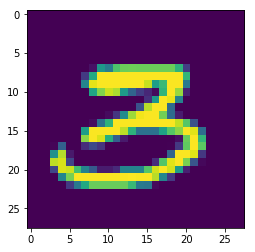

In [121]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [123]:
print(torch.argmax(net(X[0].view(1,784))[0]))

tensor(3)


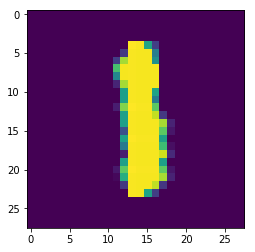

actual digit: 1


In [126]:
import matplotlib.pyplot as plt

plt.imshow(X[1].view(28,28))
plt.show()

print(f'actual digit: {torch.argmax(net(X[1].view(1,784))[0])}')